In [1]:
import pandas as pd

merged_results = pd.read_excel('clusters.xlsx')

In [2]:
merged_results["order"] = merged_results.iloc[:, 4:13].mean(axis=1)

sorted_df = merged_results.groupby('Clusters', group_keys=False).apply(lambda x: x.sort_values(by='order'))

# Drop the 'Unnamed: 0' column if it exists
sorted_df = sorted_df.drop(columns=['Unnamed: 0'])
print(sorted_df.head())

             Gene TF number Assigned name  scSoA  scYFP  inYFP  scTlG  \
5   YALI0_C20977g     TF141             -  -0.81   0.00    0.0   0.47   
8   YALI0_B08206g     TF077          CRF1  -0.34   0.00    0.0   0.00   
10  YALI0_D15334g     TF096             -   0.00  -0.28    0.0   0.00   
9   YALI0_B00660g     TF003             -  -0.98  -0.62    0.5   0.61   
4   YALI0_C09009g     TF016             -   0.00   0.00    0.0   0.00   

    HAC_scYFP  OE_inRedStar  OE_normalized_inRedStar  KO_inRedStar  \
5         0.0      1.172311                 1.156148           1.0   
8         0.0      1.274260                 1.205994           1.0   
10        0.0      1.274599                 1.260626           1.0   
9         0.0      1.444437                 1.310795           1.0   
4         0.0      1.280995                 1.171665           1.0   

    KO_normalized_inRedStar  Clusters     order  
5                       1.0         0  0.443162  
8                       1.0         0  0

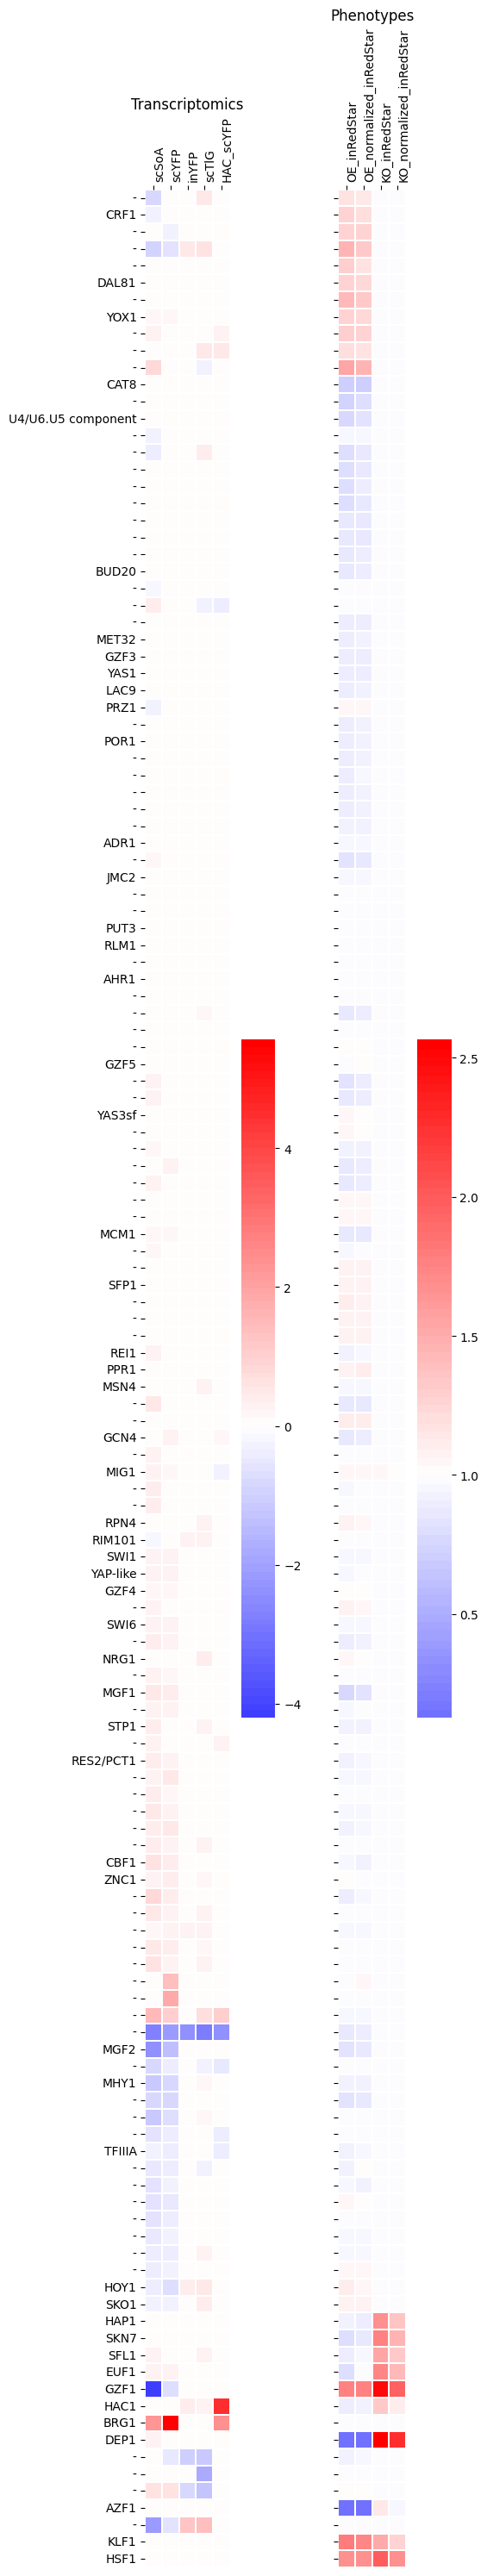

In [3]:
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import seaborn as sns


# Define the numeric data and row labels
numeric_data1 = sorted_df.iloc[:, 3:8]
numeric_data2 = sorted_df.iloc[:, 8:12]
row_labels = sorted_df['Assigned name']

# Create a custom colormap
colors = ['blue', 'white', 'red']
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=100)

# Create the figure and axes
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(6, 30), sharey=True)

# Plot the first heatmap
sns.heatmap(numeric_data1, ax=ax1, yticklabels=row_labels, cmap=cmap, center=0, cbar=True, linewidths=0.05, square=True)
ax1.xaxis.tick_top()
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha='left')
ax1.set_title('Transcriptomics')

# Plot the second heatmap
sns.heatmap(numeric_data2, ax=ax2, yticklabels=row_labels, cmap=cmap, center=1, cbar=True, linewidths=0.05, square=True)
ax2.xaxis.tick_top()
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha='left')
ax2.set_title('Phenotypes')

# Adjust the layout
plt.tight_layout()
plt.show()

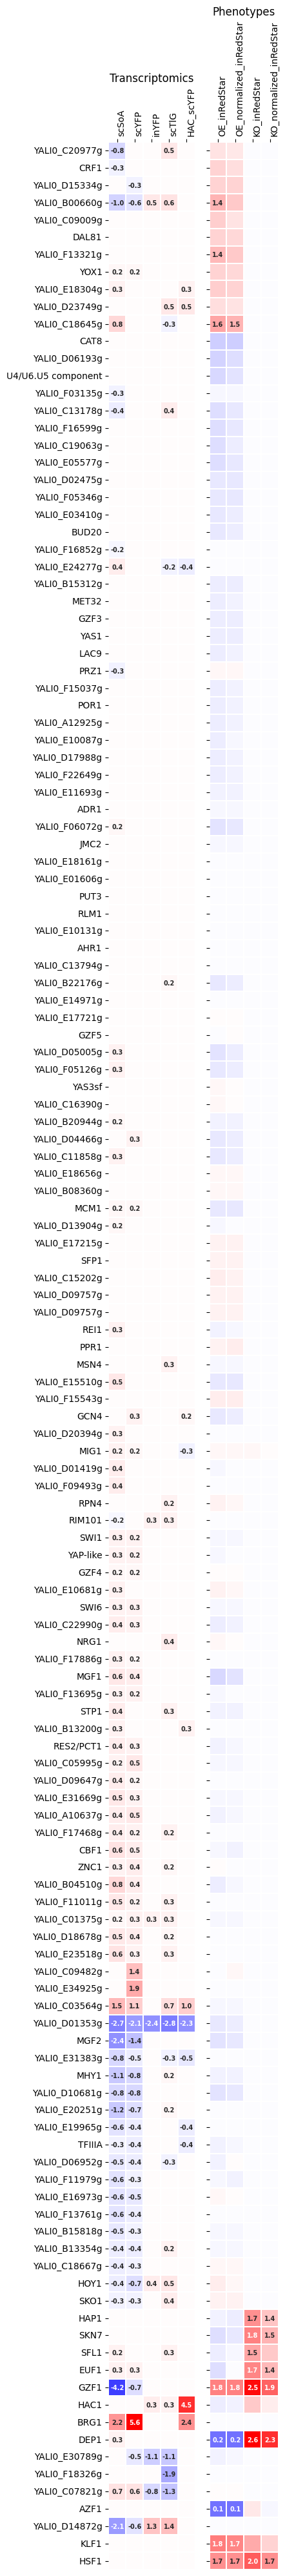

In [5]:
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable


# Define the numeric data and row labels
numeric_data1 = sorted_df.iloc[:, 3:8]
numeric_data2 = sorted_df.iloc[:, 8:12]

row_labels = [gene if assigned_name == '-' else assigned_name 
              for assigned_name, gene in zip(sorted_df['Assigned name'], sorted_df['Gene'])]

# Create a custom colormap
colors = ['blue', 'white', 'red']
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=100)

annot_kws = {"size": 7, "weight": "bold"}


# Create the figure and axes
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(5, 40), sharey=True)

# Plot the first heatmap
annot_data1 = numeric_data1.map(lambda x: f'{x:.1f}' if x != 0 else '')

# Create a blank annotation matrix for numeric_data2
annot_data2 = pd.DataFrame('', index=numeric_data2.index, columns=numeric_data2.columns)

# Specify annotations for chosen variants
annotations2 = {
    'OE_inRedStar': ['TF003', 'TF037', 'TF068', 'TF119', 'TF121', 'TF124', 'TF126', 'TF128'],
    'OE_normalized_inRedStar': ['TF037', 'TF068', 'TF121', 'TF124', 'TF126', 'TF128'],
    'KO_inRedStar': ['TF033', 'TF037', 'TF054', 'TF068', 'TF080', 'TF120', 'TF128'],
    'KO_normalized_inRedStar': ['TF033', 'TF037', 'TF054', 'TF068', 'TF120', 'TF128']
}

# Add annotations based on specified genes
for column, genes in annotations2.items():
    for gene in genes:
        if gene in sorted_df['TF number'].values:
            annot_data2.loc[sorted_df['TF number'] == gene, column] = numeric_data2.loc[sorted_df['TF number'] == gene, column].apply(lambda x: f'{x:.1f}')


sns.heatmap(numeric_data1, ax=ax1, yticklabels=row_labels, cmap=cmap, center=0, cbar=False, 
            linewidths=0.05, square=True, annot=annot_data1, fmt='', annot_kws=annot_kws)
ax1.xaxis.tick_top()
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha='left')
ax1.set_title('Transcriptomics')

# Plot the second heatmap
sns.heatmap(numeric_data2, ax=ax2, yticklabels=row_labels, cmap=cmap, center=1, cbar=False, 
            linewidths=0.05, square=True, annot=annot_data2, fmt='', annot_kws=annot_kws)
ax2.xaxis.tick_top()
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha='left')
ax2.set_title('Phenotypes')

# Adjust the layout
plt.tight_layout()
plt.show()
